**Вариант 11**


**Задание Nº3. Метод Ньютона**


---
*Цель задания: практическое освоение метода Ньютона для решения нелинейных
уравнений и систем.*

---


1. Программная реализация метода Ньютона для решения нелинейных уравнений:


Уравнение: $ctg(x) - x^2 = 0$

График:

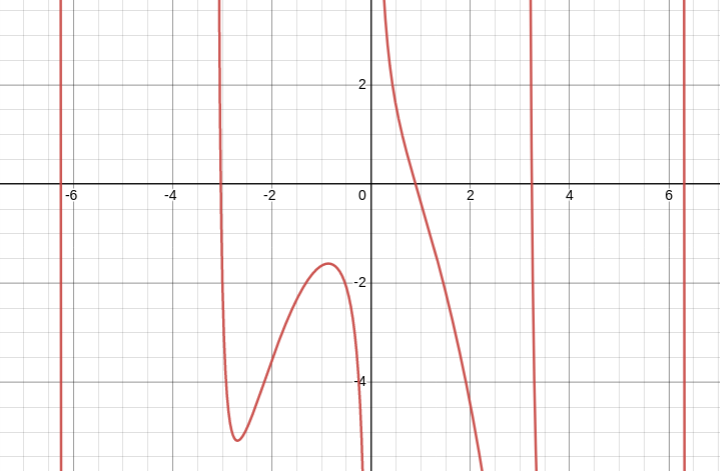

- Локализовать один любой корень уравнения $ctg(x) - x^2 = 0$ методом последовательного перебора (определить начальный интервал
локализации $[a_0, b_0]$).

- Реализовать метод Ньютона (в связке с методом половинного деления или методом хорд) для
уточнения корня на выбранном интервале локализации $[a_0, b_0]$ с точностью $e = 10^{-4}$.

- Для тестирования реализованного метода выбрать начальное приближение $x_0$ из интервала
локализации $[a_0, b_0]$ такое, что x1 (или любое другое приближение) «вылетает» из текущего
интервала локализации $[a_k, b_k]$.

- Интервал $[a_k, b_k]$ пересчитывать для каждой $k$-й итерации, независимо от того, вызывался ли
вспомогательный метод (половинного деления или хорд) или же работал только «чистый» метод
Ньютона.


In [ ]:
from math import cos, sin
import numpy as np

In [ ]:
# def f(x):
#     return cos(x)/sin(x) - x**2
# def df(x):
#     return -1/(sin(x)**2) - 2*x
## внизу функция для вылетов
def f(x):
    return (x + 2)**3 - 3*x  - 6
def df(x):
    return 3*(x + 2)**2 - 3

In [ ]:
a = 0.1
b = 1
a, b = min(a, b), max(a, b)
print(f'f(a) = {f(a)}\nf(b) = {f(b)}\nf(a)*f(b) = {f(a)*f(b)}')

f(a) = 2.9610000000000003
f(b) = 18
f(a)*f(b) = 53.298


Итак, мы видим, что $f(a)f(b) < 0$, а это значит, что по следствию из теоремы Коши на интервале $[a, b]$ имеется как минимум один корень рассматриваемого уравнения.

Уточним интервал, на котором находится корень:

In [ ]:
a, b = -3.1415925, -0.1
N = 100
h = (b-a)/N
fl = False
while not fl:
    prev_x = a
    fl = False
    for k in range(N):
        x = a + k*h
        if f(x) * f(prev_x) < 0:
            fl=True
            break
    if not fl: N = N*2
a0, b0 = a + (k-1)*h, a + k*h
print(f'interval: {[a0, b0]}')

interval: [-2.0162032749999996, -1.9857873499999998]


Найдем корни нелинейного уравнения:

In [ ]:
a, b = a0, b0
#a, b = -3.1, -0.1
a, b = -3.1, -0.1 #- для второй функции(кубической параболы), чтобы получить вылеты
eps=10**(-2)
x, x_prev = a, b
ak, bk = a, b
half_division_num = 0
iter_num = 0
while abs(f(x)) >= eps:
    x_prev = x
    x = x_prev - f(x_prev) / df(x_prev)
    if not (ak <= x <= bk):
        x = (ak + bk)/2
        half_division_num += 1

    if f(x) * f(bk) < 0 : ak = x
    elif f(x) == 0:
        break
    else: bk = x
    iter_num += 1

print(f'x = {x},\nf(x) = {f(x)}')
print(f'number of iterations: {iter_num}')
print(f'half division method was used {half_division_num} times')

x = -0.2679451933406622,
f(x) = 2.399462586311074e-05
number of iterations: 6
half division method was used 3 times


**2. Программная реализация метода Ньютона для решения систем уравнений:**
---
Решить систему нелинейных уравнений методом Ньютона с точностью $e = 10^{-4}$, используя замечание 1.2 методического пособия, найдя начальное приближение двумя способами:
1. графическим методом.
2. используя замечание 1.4 методического пособия.


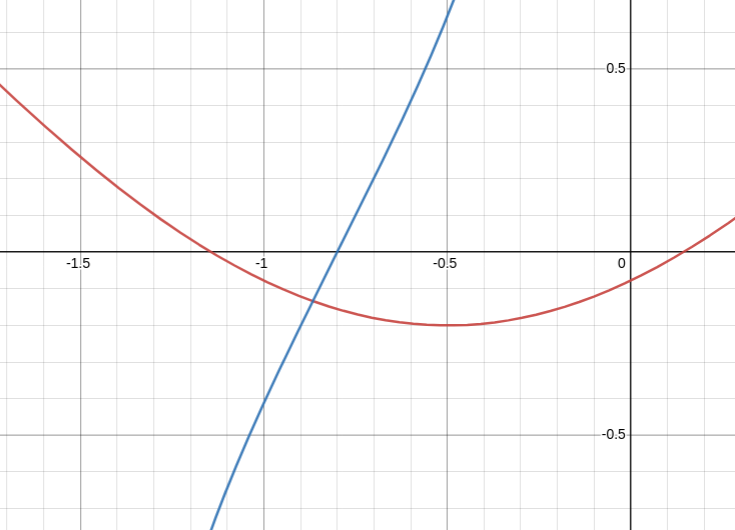

\begin{equation*}
 \begin{cases}
   cos(x+0.5) + y = 0.8
   \\
   sin(y) - 2x = 1.6
 \end{cases}
\end{equation*}

In [ ]:
def f1(x, y, lam):
    return lam*cos(x+0.5) + y - 0.8
def f2(x, y, lam):
    return lam*sin(y) - 2*x - 1.6

def df1dx(x, y, lam):
    return -lam*sin(x+0.5)
def df1dy(x, y, lam):
    return 1
def df2dx(x, y, lam):
    return -2
def df2dy(x, y, lam):
    return lam*cos(y)
def det(mat):
    return mat[0][0]*mat[1][1] - mat[0][1]*mat[1][0]
def jac(x, y, lam):
    return [[df1dx(x, y, lam), df1dy(x, y, lam)], [df2dx(x, y, lam), df2dy(x, y, lam)]]
def inv(mat):
    det = det(mat)
    return [[mat[1][1]/det, -mat[0][1]], [-mat[1][0], mat[0][0]]]


Находим приближение графическим методом:

In [ ]:
x = -1
y = -1
eps = 10**(-4)
xk = x
yk = y
lam = 1
while abs(f1(xk, yk, lam)) > eps and abs(f2(xk, yk, lam)) > eps:
    j = jac(xk, yk, lam)
    b = [-f1(xk, yk, lam), -f2(xk, yk, lam)]
    delta = np.linalg.solve(j, b)
    xk += delta[0]
    yk += delta[1]
print(f'Point of intersection: ({xk}, {yk})')
print(f1(xk, yk, 1), f2(xk, yk, 1))

Point of intersection: (-0.8665822814823709, -0.13356003378236964)
-2.235983562748345e-06 1.2554428949762553e-06


Решаем с использованием замечания:

In [ ]:
N = 100
y = 0.8
x = -0.8
for i in range(1, N+1):
    lam = i/N
    j = jac(x, y, lam)
    b = [-f1(x, y, lam), -f2(x, y, lam)]
    delta = np.linalg.solve(j, b)
    x += delta[0]
    y += delta[1]
print(f'Point of intersection: ({x}, {y})')

Point of intersection: (-0.8665863790379944, -0.1335656818639655)


In [ ]:
eps = 10**(-4)
xk = x
yk = y
lam = 1
while abs(f1(xk, yk, lam)) > eps and abs(f2(xk, yk, lam)) > eps:
    j = jac(xk, yk, lam)
    b = [-f1(xk, yk, lam), -f2(xk, yk, lam)]
    delta = np.linalg.solve(j, b)
    xk += delta[0]
    yk += delta[1]
print(f'Point of intersection: ({xk}, {yk})')

Point of intersection: (-0.8665863790379944, -0.1335656818639655)
